In [0]:
#Packages required for News Analysis code.
import pprint
import requests
import numpy as np
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.corpus import stopwords
import statistics
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import bs4 as bs
import urllib.request
import re
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim.summarization.summarizer import summarize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Call request to the NYT API. API password gained on account sign up. The request variable can be adapted with more parameters.
api = 'x04WqjfOJw3zRk5pjpG8fUfsCUkIkciN'
query = 'Coronavirus'
filter_query = 'Trump'
page = '0'
sort = 'relevance'
begin_date = '20200502'
end_date = '20200509'
request = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q='+query+'&begin_date='+begin_date+'&end_date='+end_date+'&page='+page+'&fq='+filter_query+'&sort='+sort+'&api-key='+api


In [0]:
#Pulling information with the API request and returning in JSON format
response = requests.get(request)
response_json = response.json()
pprint.pprint(response_json)

Streaming output truncated to the last 5000 lines.
                                       {'caption': None,
                                        'credit': None,
                                        'crop_name': 'thumbWide',
                                        'height': 126,
                                        'legacy': {'wide': 'images/2020/05/05/world/05virus-int-briefing-france2/05virus-int-briefing-france2-thumbWide.jpg',
                                                   'wideheight': 126,
                                                   'widewidth': 190},
                                        'rank': 0,
                                        'subType': 'wide',
                                        'subtype': 'wide',
                                        'type': 'image',
                                        'url': 'images/2020/05/05/world/05virus-int-briefing-france2/05virus-int-briefing-france2-thumbWide.jpg',
                                        'widt

In [0]:
#Accesses the docs portion of the JSON
docs = (response_json['response']['docs'])
print(docs)

[{'abstract': 'Demands for accountability run afoul of China’s nationalist narrative. A dozen countries, including Italy and India, began to relax lockdowns, and Israel all but declared victory.', 'web_url': 'https://www.nytimes.com/2020/05/04/world/coronavirus-world-cases-deaths.html', 'snippet': 'Demands for accountability run afoul of China’s nationalist narrative. A dozen countries, including Italy and India, began to relax lockdowns, and Israel all but declared victory.', 'lead_paragraph': 'This briefing has ended. Follow live updates on the coronavirus pandemic here. ', 'source': 'The New York Times', 'multimedia': [], 'headline': {'main': 'China Quiets Talk of Coronavirus Cover-Up in Wuhan', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}, 'keywords': [{'name': 'subject', 'value': 'Coronavirus (2019-nCoV)', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'Palestinians', 'rank': 2, 'major': 'N'}, {'name': 'persons', '

In [0]:
#Prints values for various sections of 'docs'.
for i in range(0,len(docs)):
  print((docs[i]['abstract']))

Demands for accountability run afoul of China’s nationalist narrative. A dozen countries, including Italy and India, began to relax lockdowns, and Israel all but declared victory.
A new cluster of cases in Seoul tests South Korea’s easing. Belarus held a tank parade.
India has started a major operation to repatriate its people. In Kenya, people held in quarantine for weeks were forced to pay to be released.
Poland has postponed its presidential election amid debate over how to conduct voting safely. In India, a deadly gas leak may have resulted from a rush to reopen a chemical plant.
French doctors found that a patient had the virus on Dec. 27, suggesting that it was circulating long before containment efforts began. A major Philippine broadcaster critical of Duterte has been forced off the air.
European plans for reopening have prompted protests and sown confusion, and the band U2 has helped get protective gear to Ireland.
Detailed guidelines for reopening drafted by the Centers for D

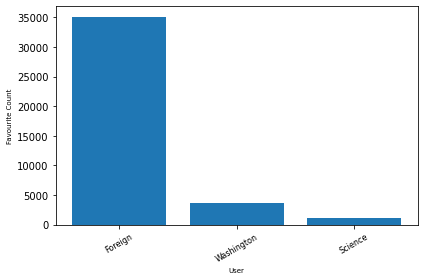

In [0]:
#Bar chart for total word counts of each news desk
y = (35115, 3591, 1053)
x = ("Foreign", "Washington", "Science")

plt.bar(x, y)
plt.xlabel('User', fontsize=7)
plt.ylabel('Favourite Count', fontsize=7)
plt.xticks(fontsize=8, rotation=30)
plt.tight_layout()


plt.savefig('WordCountTotal.jpeg')
plt.show()

In [0]:
#Creates a string of all abstracts for the given articles
text_combined = ''
for i in range(0,len(docs)):
  text_combined += docs[i]['snippet'] + ' '
  
print(text_combined)

Demands for accountability run afoul of China’s nationalist narrative. A dozen countries, including Italy and India, began to relax lockdowns, and Israel all but declared victory. A new cluster of cases in Seoul tests South Korea’s easing. Belarus held a tank parade. India has started a major operation to repatriate its people. In Kenya, people held in quarantine for weeks were forced to pay to be released. Poland has postponed its presidential election amid debate over how to conduct voting safely. In India, a deadly gas leak may have resulted from a rush to reopen a chemical plant. French doctors found that a patient had the virus on Dec. 27, suggesting that it was circulating long before containment efforts began. A major Philippine broadcaster critical of Duterte has been forced off the air. European plans for reopening have prompted protests and sown confusion, and the band U2 has helped get protective gear to Ireland. Detailed guidelines for reopening drafted by the Centers for D

In [0]:
#Strips some miscellaneous values from the text_combined string
text_combined1 = text_combined.lstrip('新冠病毒疫情最新消息')

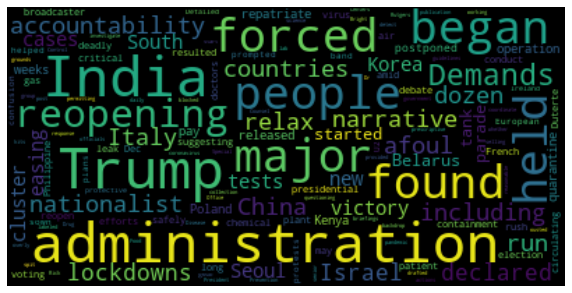

<Figure size 432x288 with 0 Axes>

In [0]:
#Takes the input text_combined1 and creates a word cloud
wordcloud = WordCloud(max_font_size=40).generate(text_combined1)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("wordcloud")

In [0]:
#Scrapes article data for a given website URL.
scraped_data = urllib.request.urlopen('https://www.nytimes.com/2020/05/08/us/politics/coronavirus-rick-bright-whistleblower-trump.html')

article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')
article_text = ""
for p in paragraphs:
 article_text += p.text

print(article_text)
#In each case with the NYT article_text returns with an advertisement before and after the article.
#the below string removes 'Advertisement'.
art1 = article_text.replace('Advertisement','')
art1

AdvertisementThe Office of Special Counsel has found “reasonable grounds” to investigate whether Dr. Rick Bright was ousted from a senior science post for questioning Trump administration actions.By Sheryl Gay StolbergWASHINGTON — A federal investigative office has found “reasonable grounds to believe” that the Trump administration was retaliating against a whistle-blower, Dr. Rick Bright, when he was ousted from a government research agency combating the coronavirus — and said he should be reinstated for 45 days while it investigates, his lawyers said Friday.The lawyers, Debra S. Katz and Lisa J. Banks, said in a statement that they were notified late Thursday afternoon that the Office of Special Counsel, which protects whistle-blowers, had “made a threshold determination” that the Department of Health and Human Services “violated the Whistleblower Protection Act by removing Dr. Bright from his position because he made protected disclosures in the best interest of the American public.

'The Office of Special Counsel has found “reasonable grounds” to investigate whether Dr. Rick Bright was ousted from a senior science post for questioning Trump administration actions.By Sheryl Gay StolbergWASHINGTON — A federal investigative office has found “reasonable grounds to believe” that the Trump administration was retaliating against a whistle-blower, Dr. Rick Bright, when he was ousted from a government research agency combating the coronavirus — and said he should be reinstated for 45 days while it investigates, his lawyers said Friday.The lawyers, Debra S. Katz and Lisa J. Banks, said in a statement that they were notified late Thursday afternoon that the Office of Special Counsel, which protects whistle-blowers, had “made a threshold determination” that the Department of Health and Human Services “violated the Whistleblower Protection Act by removing Dr. Bright from his position because he made protected disclosures in the best interest of the American public.”The finding

In [0]:
#The previous code is repeated for each of the 10 articles to give 10 values labeled art through art9.
artTotal = art1 + art2 + art3 + art4 + art5 + art6 + art7 + art8 + art9 + art
artTotal

NameError: ignored

In [0]:
artTotal = art1

In [0]:
#Newly created string artTotal is sentence tokenised for input to the LDA and NMF models. 
sentences = sent_tokenize(artTotal)
print(sentences)

['The Office of Special Counsel has found “reasonable grounds” to investigate whether Dr. Rick Bright was ousted from a senior science post for questioning Trump administration actions.By Sheryl Gay StolbergWASHINGTON — A federal investigative office has found “reasonable grounds to believe” that the Trump administration was retaliating against a whistle-blower, Dr. Rick Bright, when he was ousted from a government research agency combating the coronavirus — and said he should be reinstated for 45 days while it investigates, his lawyers said Friday.The lawyers, Debra S. Katz and Lisa J.', 'Banks, said in a statement that they were notified late Thursday afternoon that the Office of Special Counsel, which protects whistle-blowers, had “made a threshold determination” that the Department of Health and Human Services “violated the Whistleblower Protection Act by removing Dr.', 'Bright from his position because he made protected disclosures in the best interest of the American public.”The 

In [0]:
#documents set as sentences and inputted through LDA and NMF models. 
documents = sentences
no_features = 1000
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features,stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
#NMF and LDA models run.
no_topics = 7
# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [0]:
#Creates a function for displaying the results of the LDA and NMF models
def display_topics(model, feature_names, no_top_words):
 for topic_idx, topic in enumerate(model.components_):
  print ("Topic", topic_idx)
  print (" ".join([feature_names[i]
 for i in topic.argsort()[:-no_top_words - 1:-1]]))
  
#sets the number of topic words for each topic.
no_top_words = 10


In [0]:
#Display the results of the LDA and NMF models.
display_topics(lda, tf_feature_names, no_top_words)
display_topics(nmf, tfidf_feature_names, no_top_words )

Topic 0
bright dr blower just office person lawyers federal agency barda
Topic 1
masks sick public think member room use coronavirus family new
Topic 2
people tested dr question masks treatment testing american bright sick
Topic 3
hands wash sure home don make frequently distance weeks possible
Topic 4
dr bright said complaint mr coronavirus health department called statement
Topic 5
said dr mr trump flu american contributions members bright kadlec
Topic 6
health services human coronavirus fund department symptoms caitlin able dr
Topic 0
dr said mr kadlec month ms trump azar called bright
Topic 1
masks wear sick people don need public room person like
Topic 2
bright transferred complaint barda ms allegations use month removal malaria
Topic 3
health services human department recommendation azar president oakley spokeswoman drugs
Topic 4
raisers fund goal started weeks coronavirus able eshoo filed federal
Topic 5
make sure contributions money like don home wash hands having
Topic 6
offic

In [0]:
#String created for each of the topic models
topicslda = "coronavirus people government country new pandemic virus president countries home people symptoms wipe mr coronavirus collection live new distance coronavirus weeks said covid virus 19 person world tested united sick people like room good separate money wear tested don need supply health workers care time strong medical remains decide said vaccine dr trump united states coronavirus health house public able cases state help needs affected symptoms hospitalization patients know"
topicsnmf = "coronavirus mr people virus dr health new country government masks wear sick caregiver room cloth don recommended americans advised tested decide need medical exposing infecting depends contained difficult lot home wipe sure make distance live remember cart handle disinfecting raisers fund gofundme related past 30 started fail sheer means don wondering decrease contributions meals forget frequently plan wash hands united china states clinical trials underway europe trump chinese president"

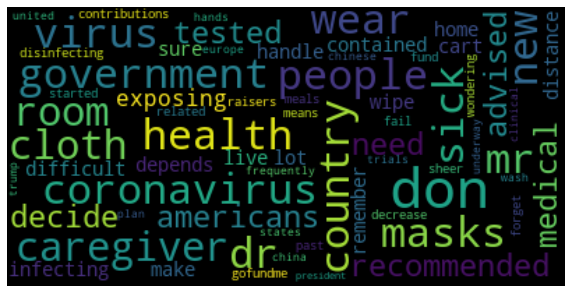

In [0]:
#Wordcloud created for each of the topic models. Combines all topics into one word cloud.
wordcloud = WordCloud(max_font_size=40).generate(topicsnmf)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
#summarise article 1 (art1) to 300 words
print(summarize(art1, word_count= 300))

Banks, said in a statement that they were notified late Thursday afternoon that the Office of Special Counsel, which protects whistle-blowers, had “made a threshold determination” that the Department of Health and Human Services “violated the Whistleblower Protection Act by removing Dr. Bright from his position because he made protected disclosures in the best interest of the American public.”The finding comes just days after the lawyers filed a whistle-blower complaint saying that Dr. Bright’s removal last month as head of the Biomedical Advanced Research and Development Authority was payback.
Dr. Kadlec and Mr. Azar have not responded directly, though Mr. Trump has called Dr. Bright “disgruntled.”On Tuesday, after Dr. Bright’s complaint was filed, Ms. Oakley, the spokeswoman for the Department of Health and Human Services, said that Dr. Bright had been “transferred to N.I.H. to work on diagnostics testing — critical to combating Covid-19 — where he has been entrusted to spend upward 

In [0]:
#Further summarise 
print(summarize(art1, ratio = 0.025))

Banks, said in a statement that they were notified late Thursday afternoon that the Office of Special Counsel, which protects whistle-blowers, had “made a threshold determination” that the Department of Health and Human Services “violated the Whistleblower Protection Act by removing Dr. Bright from his position because he made protected disclosures in the best interest of the American public.”The finding comes just days after the lawyers filed a whistle-blower complaint saying that Dr. Bright’s removal last month as head of the Biomedical Advanced Research and Development Authority was payback.
